# Introduction to CNNs

## What is CNN ?


#### A CNN is a neural network that typically contains several types of layers, which includes :-

* convolutional layer 
* pooling layer, and 
* activation layer.

## Convolutional Layer

* To understand what a CNN is, you need to understand how convolutions work. 

* Imagine you have an image represented as a 5x5 matrix of values, and you take a 3x3 matrix and slide that 3x3 window around the image. 

* At each position the 3x3 visits, you matrix multiply the values of your 3x3 window by the values in the image that are currently being covered by the window. 

* This results in a single number the represents all the values in that window of the image. 

Here’s a gif for clarity:

![Conv Gif](./conv.gif)

## Level - 1 - Code the Convolutional Layer


![Detailed Conv Gif](./conv_detailed.gif)

### Question 1

In [1]:
# Write a function which does the convolution.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [2]:
import numpy as np
import pandas as pd
import random

In [3]:
image = np.random.randint(low = 0, high = 3, size =(2,3,7,7))

In [4]:
filters = np.random.randint(low = -1, high = 2, size =(2,3,3,3))

In [5]:
bias = np.random.randint(low=0, high = 2, size = (len(filters)))

In [6]:
image

array([[[[1, 1, 0, 1, 0, 1, 1],
         [1, 2, 2, 1, 2, 0, 2],
         [2, 0, 0, 0, 0, 0, 2],
         [2, 1, 2, 0, 0, 0, 2],
         [1, 2, 2, 1, 0, 0, 0],
         [1, 0, 1, 2, 0, 1, 2],
         [0, 1, 0, 2, 0, 1, 1]],

        [[0, 2, 1, 1, 0, 2, 1],
         [1, 1, 1, 1, 2, 0, 1],
         [1, 0, 2, 0, 1, 2, 1],
         [1, 0, 2, 2, 2, 1, 0],
         [2, 0, 2, 2, 2, 1, 1],
         [1, 2, 0, 2, 0, 2, 1],
         [0, 2, 2, 0, 2, 0, 0]],

        [[0, 2, 1, 1, 0, 1, 2],
         [1, 2, 1, 1, 1, 0, 0],
         [2, 0, 2, 1, 1, 1, 0],
         [0, 0, 2, 1, 2, 1, 2],
         [0, 1, 1, 2, 2, 1, 1],
         [0, 2, 2, 0, 1, 1, 0],
         [2, 0, 0, 2, 1, 1, 1]]],


       [[[2, 0, 1, 2, 2, 2, 1],
         [2, 2, 0, 2, 0, 0, 0],
         [2, 1, 0, 1, 0, 2, 0],
         [1, 1, 0, 2, 0, 0, 1],
         [2, 1, 1, 2, 1, 2, 1],
         [1, 1, 0, 0, 1, 0, 0],
         [2, 2, 2, 0, 1, 0, 2]],

        [[1, 2, 1, 2, 2, 0, 0],
         [1, 2, 1, 0, 1, 2, 1],
         [1, 1, 0, 2, 1, 2, 1]

In [7]:
filters

array([[[[ 0,  0,  1],
         [-1, -1,  1],
         [-1, -1, -1]],

        [[ 0,  0, -1],
         [ 0, -1, -1],
         [-1,  0,  1]],

        [[ 0,  1,  1],
         [-1,  1,  1],
         [-1,  1,  0]]],


       [[[ 1, -1,  0],
         [-1,  1,  1],
         [-1, -1, -1]],

        [[ 1,  1, -1],
         [ 0, -1,  0],
         [ 1,  0, -1]],

        [[ 0, -1, -1],
         [-1,  1,  0],
         [ 0, -1,  0]]]])

----

**KEYWORDS**
- Image = 4D Matrix: Collection of 'n' Sub-Images(3xnxn)
- Sub-Image = Set of 3 mini-images (e.g. R,G,B) 
- mini-Image = Set of many mini-patches within a sub-image (3x3 Matrix)

- Filters = 4D Matrix: Collection of 'm' Sub-Filters(3xnxn)
- Sub-Filter = Set of 3 mini-filters (3x 3x3)
- Mini-Filter = Set of many mini-filters within a sub-filter(3x3 Matrix)

----

In [8]:
#  Accepts a Given sub-image (e.g. Image[0][0])
## - Returns all possible stride counts with output matrix size

def possible_StrideValues_OutputSizeValues(image):
    width = len(image[0])
    stride = 1
    stride_form = []
    while stride:
        x = [i for i in range(1,width-1,stride)]    ## Gives possible iterations for a given stride
        if x[len(x)-1] == width-2:
            count_loop = len(x)                     ## Count of possible iterations for traversal = Output Size
            stride_form.append([stride,len(x)])
        else:
            return stride_form
        
        stride += 1

In [9]:
#  Accepts a Given sub-image and Given stride count
## - Returns the size of the output matrix

def Output_Size(image, stride):
        possible_outputs = possible_StrideValues_OutputSizeValues(image)
        for possible_stride in possible_outputs:
            if possible_stride[0] == stride:
                return possible_stride[1]

In [10]:
def Traversal_Counter(width, filtration_size, stride):
    Count = 0
    for i in range(1,width,stride):
        Count += 1
        if(i == (width-filtration_size+1)):
            break        
    return Count

In [11]:
#  Accepts a sub-image and stride count
## - Extracts mini-images(9 images, all 3x3 matrices) from a sub-image(e.g. image[0][0])

def mini_image(image, filteration_size, stride):    
    
    width = len(image[0])
    sub_image = []
    ROW = 0
    COL=0
    
    Traversal_Count = Traversal_Counter(width, filteration_size, stride)
    
    for vertical_traversal in range(Traversal_Count):
        for horizontal_traversal in range(Traversal_Count):     
            
            sub_image.append(image[ROW:ROW+filteration_size, COL:COL+filteration_size]) 
            COL += stride
        COL =0
        ROW+=stride
        
    return sub_image

In [56]:
image.shape

(320, 400, 3)

In [57]:
mini_image(image, 3, 2)

[array([[[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]]], dtype=uint8), array([[[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]]], dtype=uint8), array([[[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]]], dtype=uint8), array([[[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  76]],
 
        [[113, 105,  76],
         [113, 105,  76],
         [113, 105,  

In [12]:
#  Accepts a sub-image, stride count and a sub-filter
##  - Multiplies each mini-image of a sub-image with mini-filter of sub-filter

def image_patching(image, stride, filters):
    
    filteration_size = len(filters[0])
    
    list_mini_images = mini_image(image, filteration_size, stride) 
    
    list_of_values = []
    Filter_Image_multiply = []
    
    for each_mini_image in list_mini_images:
        list_of_values.append(mul(each_mini_image, filters))
    
    output_size = int(np.sqrt(len(list_of_values)))
    
    for each_value in range(0,len(list_of_values), output_size):
        Filter_Image_multiply.append([value for value in list_of_values[each_value:each_value+int(output_size)]])
    
    return Filter_Image_multiply

In [13]:
#  Accepts a mini-image of a sub-image and a mini-filter of a sub-filter
## - Multiplies mini-image and mini-filter

def mul(mini_image, filters):
    mul_matrix = mini_image*filters
    return np.sum(mul_matrix)

In [14]:
def bias_addition(Output_Per_Set):
    Output = []
    
    for each_bias_value, each_SubOutput_value in zip(bias, Output_Per_Set):
        Output.append(each_bias_value + each_SubOutput_value)
        
    return Output

In [15]:
#  Accepts a Whole Image Set, stride count and Whole Filter Set Returns List of Convuled Matrices AND List of Outputs 
##  - Multiplies each mini-image of a sub-image with mini-filter of sub-filter

def convulation_3d(image, stride, filters):
    
    ## For storing Convoled Matrices
    list_each_convoled_features = []
    list_per_Filter = []
    list_per_SET = []
    
    ## For Storing Outputs
    output_per_ImageFilterSet = []
    Total_output =[]
    
    image_size = len(image)
    filters_size = len(filters)
    
    for k in range(image_size):
        for i in range(filters_size):
            
            Output_size = Traversal_Counter(len(image[0][0]), len(filters[0]), stride)
            output_sum = np.zeros((Output_size, Output_size))
            
            for j in range(len(filters[0])):
                ## Contains element-wise matrix multiplication of Each(SubImage*SubFilter, e.g. Image[0][0]*Filter[0][0])
                Each_SubFilter_Each_SubImage = np.array(image_patching(image[k][j], stride, filters[i][j]))
                
                ## List of Each Convoled Feature
                list_each_convoled_features.append(Each_SubFilter_Each_SubImage)
                
                ## Contains summed ouput of one SubImage and one SubFilter (e.g. SUM(Image[0][0,1,2]*Filter[0][0,1,2])
                output_sum += Each_SubFilter_Each_SubImage 
            
            list_per_Filter.append(list_each_convoled_features)
            list_each_convoled_features = []
            output_per_ImageFilterSet.append(output_sum)
        
        
        # Storing Convoled Features
        list_per_SET.append(list_per_Filter)
        list_per_Filter = []
       
        # Storing Total Outputs
        Total_output.append(bias_addition(output_per_ImageFilterSet))
        output_per_ImageFilterSet = []
        
    return list_per_SET, Total_output

In [16]:
#  Returns Convuled Matrices

def convulation_matrices():
    return convulation_3d(image, 2, filters)[0]

In [17]:
#  Accepts a Input Image Set, Input Stride count and Input Filter Set
##  - Prints the Result

def output(image, stride, filters):
    
    ## Contains the list of output matrices
    output = convulation_3d(image, stride, filters)[1]
    
    index = 0
    print("**********************************************************\nOUTPUT MATRICES \n**********************************************************\n")
    for i in range(len(image)):
        for j in range(len(filters)):
            print('- IMAGE:', i, ', Filter:', j, "\n", output[i][j], "\n")
            index+=1
        print("<-------------------------------------------------------------------->\n\n")

In [18]:
# ENTER YOUR IMAGE SET, STRIDE COUNT AND FILTER SET HERE!
output(image, 2, filters)

**********************************************************
OUTPUT MATRICES 
**********************************************************

- IMAGE: 0 , Filter: 0 
 [[-1. -3.  0.]
 [-4. -5.  3.]
 [ 4. -3. -4.]] 

- IMAGE: 0 , Filter: 1 
 [[ -2.   0.  -7.]
 [ -6. -11.   1.]
 [ -6.  -8.   0.]] 

<-------------------------------------------------------------------->


- IMAGE: 1 , Filter: 0 
 [[-10.   3.  -2.]
 [ -1.  -7.  -1.]
 [ -4.  -1.  -3.]] 

- IMAGE: 1 , Filter: 1 
 [[ -5.  -1.  -4.]
 [ -3.  -6.  -5.]
 [-10.  -8.  -8.]] 

<-------------------------------------------------------------------->




-----------

## Pooling Layers

* Pooling works very much like convoluting, where we take a kernel and move the kernel over the image, the only difference is the function that is applied to the kernel and the image window isn’t linear.

* Max pooling and Average pooling are the most common pooling functions. 

* Max pooling takes the largest value from the window of the image currently covered by the kernel, while average pooling takes the average of all values in the window.

![Pooling Gif](./pooling.gif)

## Level - 2 - Code the Pooling Layer

![Detailed Conv Gif](./Max_pooling.png)

### Question 1

In [24]:
# Write a function which does the max pooling.
# Code for a 3d Matrix
# Before writing out code, write function header with parameters and get it reviewed by Mentors

In [25]:
''' ENTER TYPE OF POOLING(Max OR Avg) and Filteration Size(1,2,3, etc)'''

Pooling_Matrices('Max', 2)

[array([[-1,  4],
        [ 1,  4]]), array([[-2, -2],
        [-2, -3]]), array([[5, 4],
        [5, 5]]), array([[1, 2],
        [0, 2]]), array([[2, 2],
        [0, 2]]), array([[-2, -2],
        [ 0, -3]]), array([[-1, -1],
        [-1, -1]]), array([[-1, -2],
        [-1, -2]]), array([[5, 5],
        [6, 3]]), array([[ 0,  0],
        [-3, -3]]), array([[1, 1],
        [1, 1]]), array([[-1, -1],
        [-1, -1]])]

### Question 2

In [26]:
Pooling_Matrices('Avg',2)

[array([[-3.75, -0.75],
        [-3.75, -1.75]]), array([[-3.75, -3.5 ],
        [-3.75, -4.5 ]]), array([[ 3.25,  2.  ],
        [ 4.5 ,  3.  ]]), array([[-1.5 , -1.5 ],
        [-2.25, -0.5 ]]), array([[-0.25,  1.  ],
        [-1.5 ,  0.75]]), array([[-3.  , -3.75],
        [-4.  , -4.75]]), array([[-4.75, -2.75],
        [-5.  , -3.25]]), array([[-3.25, -3.  ],
        [-3.  , -3.  ]]), array([[ 3.25,  3.  ],
        [ 3.75,  2.25]]), array([[-1.75, -2.5 ],
        [-3.5 , -4.  ]]), array([[ 0.75,  0.5 ],
        [-0.5 ,  0.25]]), array([[-2.75, -2.  ],
        [-2.75, -3.  ]])]

In [22]:
# Accepts Type_Pooling = (Max OR Avg); Filteration_size = Type of Traversal which determines Output_Matrix Size (e.g. 2 at a time, thus 2x2 Output mtrix)
## Returns a List of Pooled Matrices

def Pooling_Matrices(Type_Pooling, Filteration_size):
    
    list_convuled_matrices = convulation_matrices()
    list_pooled_matrices = []
    
    for Sub_Imagefeature in list_convuled_matrices:
        for each_feature in Sub_Imagefeature:
            for eachMatrix_each_feature in each_feature:
            
                list_pooled_matrices.append(np.array(Pooling_Operation(eachMatrix_each_feature, Type_Pooling, Filteration_size)))
                
    return(list_pooled_matrices)

In [23]:
def Pooling_Operation(eachMatrix_each_feature, Type_Pooling, Filteration_size):
    
    list_of_sub_matrices = mini_image(eachMatrix_each_feature, Filteration_size, 1) 
    
    list_of_values = []
    Convert_Into_Matrix = []
    
    if Type_Pooling == 'Max':
        ## Stores list of all MAX POOLED values in an linear array
        for each_mini_image in list_of_sub_matrices:
            list_of_values.append(each_mini_image.max())
    elif Type_Pooling == 'Avg':
        ## Stores list of all AVG POOLED values in an linear array
        for each_mini_image in list_of_sub_matrices:
            list_of_values.append(each_mini_image.mean())
               
    ## Converts a array of values in SizeGiven Matrices
    for each_value in range(0,len(list_of_values), Filteration_size):
        Convert_Into_Matrix.append([value for value in list_of_values[each_value:each_value+int(2)]])
    
    return Convert_Into_Matrix

.

.

.

# Lets Load an image and visualize the Conv and Pool

### Load the Conv and Max pool using Keras

In [27]:
from keras.layers import Convolution2D, MaxPooling2D, Activation
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt
import cv2  # only used for loading the image, you can use anything that returns the image as a np.ndarray

%matplotlib inline

Using TensorFlow backend.


### Display the image

In [28]:
image = cv2.imread('cat.png') # Please load different Images to explore 

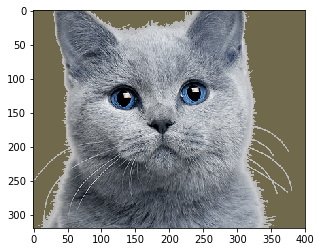

In [29]:
plt.imshow(image)

In [30]:
# what does the image look like?
image.shape

(320, 400, 3)

## Level 3 - Performing and Understading Convolutions 

### Question 1 

### Why it has 3 dimensions ?? 

Answer - Width x Height X 3 Layers(R,G,B)

## Play Around with below code to enhance your understanding of CNN

## Lets create a model with 1 Convolutional layer

### Question 2

### Please fill in the comments 

In [52]:
model = Sequential()
model.add(Convolution2D(3,    # ___the dimensionality of the output matrix_________
                        (3,    # ___Width________ dimension of kernel 
                        3),    # ___Height________ dimension of kernel
                        input_shape=image.shape))

In [53]:
image_batch = np.expand_dims(image,axis=0)

In [54]:
# Inc dims to make it 4D
image_batch.shape

(1, 320, 400, 3)

### Question 3

### What Happens if we dont expand the dims of image ? Why we need to do it ?


Answer - We are passing the no of samples as 1, which is the image batch, in scratch code, we attain it using a loop over the no. of samples. Basically we need the no of samples to compute.

In [45]:
image_batch.shape

(1, 320, 400, 3)

In [46]:
conv_image = model.predict(image_batch)

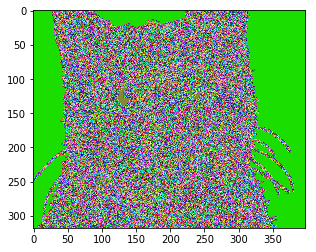

In [48]:
plt.imshow(np.squeeze(conv_image, axis=0))

In [49]:
def visualize_image(model, image):

    image_batch = np.expand_dims(image,axis=0)
    conv_image = model.predict(image_batch)
    
    # here we get rid of that added dimension and plot the image
    conv_image = np.squeeze(conv_image, axis=0)
    
    print (conv_image.shape)
    plt.imshow(conv_image)

(318, 398, 3)


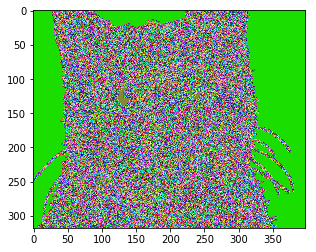

In [50]:
visualize_image(model, image)

## Level 4 - Use Your Conv Function to visualize the image

### Question 1 - Call your function to perform conv and plot the image obatined 

## 10x10 Kernel Convimage

(311, 391, 3)


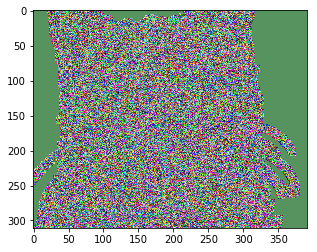

In [51]:
model = Sequential()
model.add(Convolution2D(3,    
                        (10,    
                        10),    
                        input_shape=image.shape))


visualize_image(model, image)

## Level 5

### Question 1

### What difference you notice between 3\*3 and 10\*10 kernal size ? 

Answer - 

### Question 2

### What is the reason behing this difference ?

Answer -

# Play around with code below, to enhance your understading

## Another image Vis 

In [ ]:
# Note: matplot lib is pretty inconsistent with how it plots these weird image arrays.

def nice_image_printer(model, image):
    '''prints the image as a 2d array'''
    image_batch = np.expand_dims(image,axis=0)
    conv_image2 = model.predict(image_batch)

    conv_image2 = np.squeeze(conv_image2, axis=0)
    print (conv_image2.shape)
    conv_image2 = conv_image2.reshape(conv_image2.shape[:2])

    print (conv_image2.shape)
    plt.imshow(conv_image2)

In [ ]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))

In [ ]:
nice_image_printer(model, image)

### Question 3

### Why this image is different from previous one ?

Answer

## Increase the kernal size

In [ ]:
# 15x15 kernel size
model = Sequential()
model.add(Convolution2D(1,    
                        (15,    
                        15),   
                        input_shape=image.shape))

nice_image_printer(model, image)

## Adding a Relu Activation

In [ ]:
model = Sequential()
model.add(Convolution2D(1,    
                        (3,    
                        3),    
                        input_shape=image.shape))
# Lets add a new activation layer!
model.add(Activation('relu'))



In [ ]:
nice_image_printer(model, image)

## Adding a Max pool After Relu

In [ ]:
model = Sequential()
model.add(Convolution2D(3,    
                        (3,    
                        3),    
                        input_shape=image.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5,5)))

visualize_image(model, image)